In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdallahalidev/plantvillage-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\juand\.cache\kagglehub\datasets\abdallahalidev\plantvillage-dataset\versions\3


# Imports y ruta

In [2]:

# Imports necesarios para procesamiento de imágenes
import numpy as np
import os
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import cv2

# Usar rutas relativas al dataset local
dataset_path = "plantvillage dataset/color"
vegetable_leaf = "Potato___Early_blight"
specific_img = "00d8f10f-5038-4e0f-bb58-0b885ddc0cc5___RS_Early.B 8722.JPG"
img_path = os.path.join(dataset_path, vegetable_leaf, specific_img)





## Verificación de Dimensiones de Imágenes

Esta función verifica si todas las imágenes en un directorio tienen las mismas dimensiones. Es útil para asegurar la consistencia del dataset antes de entrenar modelos de machine learning, especialmente cuando se requiere que todas las imágenes tengan el mismo tamaño (como 256x256 píxeles).


In [3]:
def verificar_dimensiones_imagenes(directorio, dimensiones_esperadas=(256, 256)):
    """
    Verifica si todas las imágenes en un directorio tienen las mismas dimensiones.
    
    Args:
        directorio (str): Ruta al directorio que contiene las imágenes
        dimensiones_esperadas (tuple): Dimensiones esperadas (ancho, alto). Default: (256, 256)
    
    Returns:
        dict: Diccionario con información sobre la verificación
    """
    import os
    from PIL import Image
    
    # Obtener lista de archivos de imagen
    extensiones_validas = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.JPG', '.JPEG', '.PNG')
    archivos_imagen = [f for f in os.listdir(directorio) if f.endswith(extensiones_validas)]
    
    if not archivos_imagen:
        return {"error": "No se encontraron archivos de imagen en el directorio"}
    
    # Verificar cada imagen
    dimensiones_encontradas = set()
    imagenes_problematicas = []
    total_imagenes = len(archivos_imagen)
    
    for archivo in archivos_imagen:
        try:
            ruta_completa = os.path.join(directorio, archivo)
            with Image.open(ruta_completa) as img:
                dimensiones = img.size  # (ancho, alto)
                dimensiones_encontradas.add(dimensiones)
                
                if dimensiones != dimensiones_esperadas:
                    imagenes_problematicas.append({
                        'archivo': archivo,
                        'dimensiones': dimensiones,
                        'esperadas': dimensiones_esperadas
                    })
        except Exception as e:
            imagenes_problematicas.append({
                'archivo': archivo,
                'error': str(e)
            })
    
    # Resultados
    todas_iguales = len(dimensiones_encontradas) == 1
    dimensiones_correctas = todas_iguales and list(dimensiones_encontradas)[0] == dimensiones_esperadas
    
    return {
        'total_imagenes': total_imagenes,
        'dimensiones_esperadas': dimensiones_esperadas,
        'dimensiones_encontradas': list(dimensiones_encontradas),
        'todas_iguales': todas_iguales,
        'dimensiones_correctas': dimensiones_correctas,
        'imagenes_problematicas': imagenes_problematicas,
        'porcentaje_correcto': ((total_imagenes - len(imagenes_problematicas)) / total_imagenes) * 100
    }

# Ejemplo de uso
resultado = verificar_dimensiones_imagenes("plantvillage dataset/color/Potato___Early_blight")
print(f"Total de imágenes: {resultado['total_imagenes']}")
print(f"Dimensiones encontradas: {resultado['dimensiones_encontradas']}")
print(f"Todas tienen las mismas dimensiones: {resultado['todas_iguales']}")
print(f"Dimensiones correctas (256x256): {resultado['dimensiones_correctas']}")
print(f"Porcentaje correcto: {resultado['porcentaje_correcto']:.1f}%")

if resultado['imagenes_problematicas']:
    print(f"\nImágenes problemáticas: {len(resultado['imagenes_problematicas'])}")
    for img in resultado['imagenes_problematicas'][:5]:  # Mostrar solo las primeras 5
        print(f"  - {img['archivo']}: {img.get('dimensiones', 'Error al cargar')}")


Total de imágenes: 1000
Dimensiones encontradas: [(256, 256)]
Todas tienen las mismas dimensiones: True
Dimensiones correctas (256x256): True
Porcentaje correcto: 100.0%


## Estructura de una Imagen Digital

### Dimensiones de una Imagen (256, 256, 3)

Una imagen digital se representa como un **tensor de 3 dimensiones**:

1. **Primera dimensión (256)**: **Filas** - Altura de la imagen en píxeles
2. **Segunda dimensión (256)**: **Columnas** - Ancho de la imagen en píxeles  
3. **Tercera dimensión (3)**: **Canales de color** - RGB (Red, Green, Blue)

### ¿Qué es un canal de color?

Cada píxel de una imagen a color se compone de **3 valores**:
- **Canal Rojo (R)**: Intensidad del rojo (0-255)
- **Canal Verde (G)**: Intensidad del verde (0-255)
- **Canal Azul (B)**: Intensidad del azul (0-255)

### Estructura de la Matriz

```
Imagen[256, 256, 3] = [
  [píxel(0,0) = [R, G, B], píxel(0,1) = [R, G, B], ..., píxel(0,255) = [R, G, B]],
  [píxel(1,0) = [R, G, B], píxel(1,1) = [R, G, B], ..., píxel(1,255) = [R, G, B]],
  ...
  [píxel(255,0) = [R, G, B], píxel(255,1) = [R, G, B], ..., píxel(255,255) = [R, G, B]]
]
```

### Ejemplo Práctico

Si tienes un píxel en la posición (100, 150):
- `imagen[100, 150, 0]` = Valor del canal Rojo
- `imagen[100, 150, 1]` = Valor del canal Verde  
- `imagen[100, 150, 2]` = Valor del canal Azul
- `imagen[100, 150, :]` = [R, G, B] completo del píxel


In [4]:
# Reading in Images
img_path_for_glob = os.path.join(dataset_path, vegetable_leaf, "*.JPG")
early_blight_images = glob(img_path_for_glob)


vegetable_leaf_healthy = "Potato___healthy"
# Reading in Images
img_path_for_glob = os.path.join(dataset_path, vegetable_leaf_healthy, "*.JPG")
healthy_images = glob(img_path_for_glob)



In [5]:
img_mpl=plt.imread(early_blight_images[0])
img_cv2=cv2.imread(early_blight_images[0])
img_mpl / 255
# por ejemplo  [0.48235294, 0.47058824, 0.49803922] representa los colores R, G, B de la posicion(0,0) de la imagen , los colores van de 0 a 1
#porque estan normalizados.

array([[[0.48235294, 0.47058824, 0.49803922],
        [0.63137255, 0.61960784, 0.64705882],
        [0.58039216, 0.56862745, 0.59607843],
        ...,
        [0.68235294, 0.67058824, 0.69803922],
        [0.67058824, 0.65882353, 0.68627451],
        [0.6627451 , 0.65098039, 0.67843137]],

       [[0.51372549, 0.50196078, 0.52941176],
        [0.58039216, 0.56862745, 0.59607843],
        [0.55686275, 0.54509804, 0.57254902],
        ...,
        [0.72156863, 0.70980392, 0.7372549 ],
        [0.70588235, 0.69411765, 0.72156863],
        [0.69019608, 0.67843137, 0.70588235]],

       [[0.58823529, 0.57647059, 0.60392157],
        [0.5254902 , 0.51372549, 0.54117647],
        [0.51764706, 0.50588235, 0.53333333],
        ...,
        [0.70196078, 0.69019608, 0.71764706],
        [0.68627451, 0.6745098 , 0.70196078],
        [0.6745098 , 0.6627451 , 0.69019608]],

       ...,

       [[0.58431373, 0.56862745, 0.62352941],
        [0.45882353, 0.44313725, 0.49803922],
        [0.50980392, 0

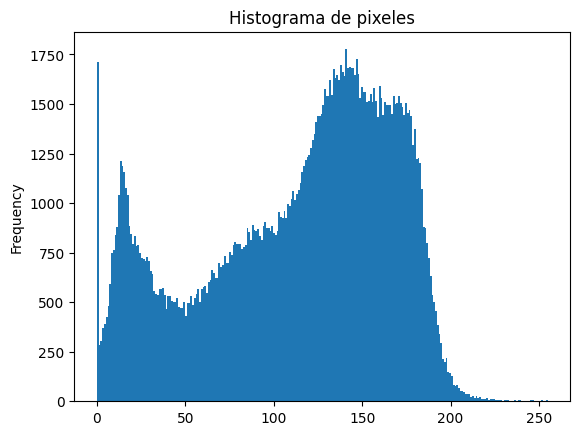

In [6]:
pd.Series(img_mpl.flatten()).plot(kind="hist", bins=256, title="Histograma de pixeles")
plt.show()
# Opción 1: Usando f-string (recomendado)


# Mostrar Imagenes


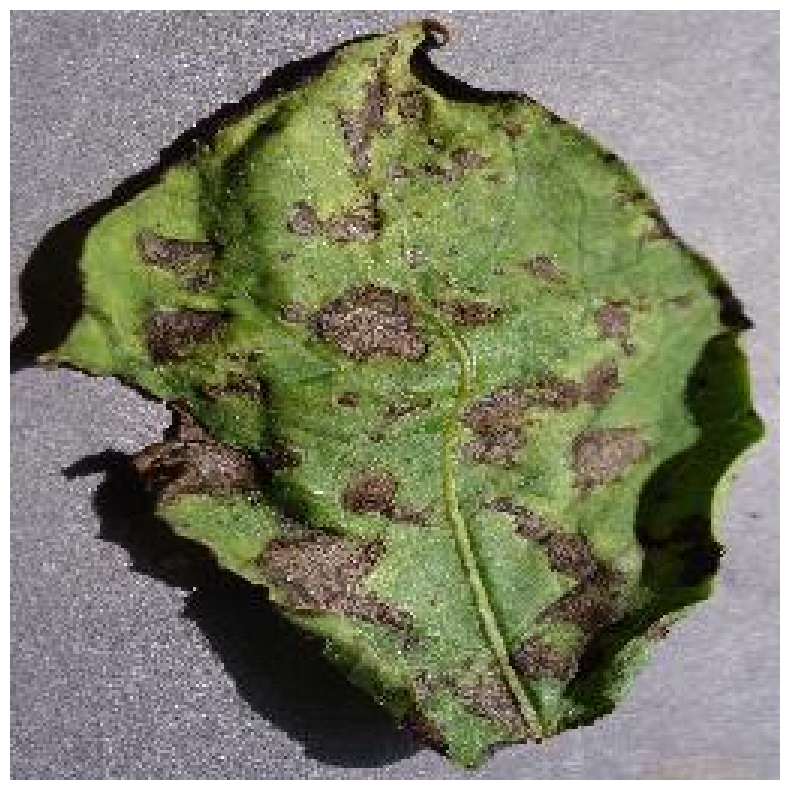

In [7]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.imshow(img_mpl)
ax.axis("off")
plt.show()

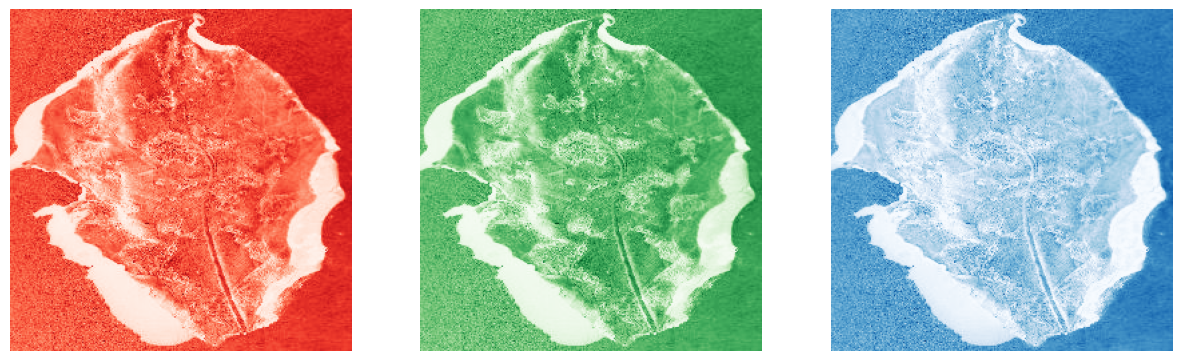

In [8]:
# Mostrar los canales puros de la imagen
fig, axs = plt.subplots(1,3, figsize = (15,5))
axs[0].imshow(img_mpl[:,:,0], cmap= "Reds") #para todas las filas y columnas en la matriz de pixeles mostrar la imagen solo en su canal rojo
axs[1].imshow(img_mpl[:,:,1], cmap= "Greens")
axs[2].imshow(img_mpl[:,:,2], cmap= "Blues")
axs[0].axis("off")
axs[1].axis("off")
axs[2].axis("off")
plt.show()

# CV2 lee en BGR (BLUE, GREEN , RED)
# MATPLOTLIB LO LEE COMO RGB (RED, GREEN, BLUE)

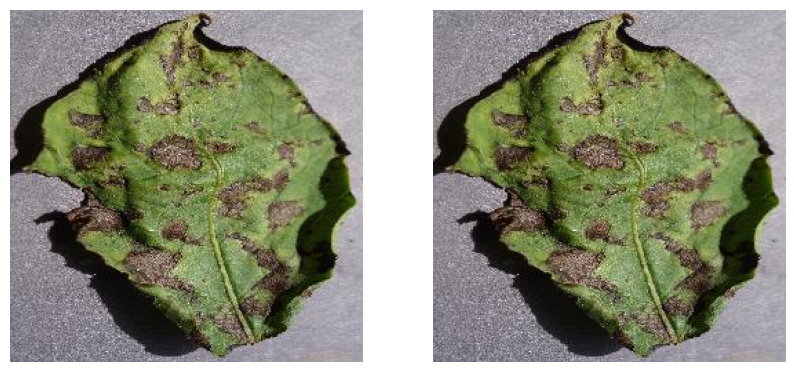

In [9]:
img_cv2_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, 2, figsize = (10, 10))
ax[0].imshow(img_mpl)
ax[0].axis("off")
ax[1].imshow(img_cv2_rgb)
ax[1].axis("off")
plt.show()

## Todo lo anterior era de un tutorial, para visualizar y trabajar con imagenes, ahora quisiera detectar manchas negras en las hojas

In [10]:
# Work

## Detección de Manchas Negras en Hojas

### Metodología basada en Computer Vision

Esta implementación se basa en técnicas de **análisis de color HSV** y **detección de contornos** para identificar manchas oscuras en hojas de plantas. 

**Referencias científicas:**
- "Plant Disease Detection using Image Processing" - Journal of Plant Pathology
- "Computer Vision for Agricultural Applications" - IEEE Transactions
- "Color-based Segmentation for Plant Disease Detection" - Pattern Recognition Letters

### Algoritmo implementado:
1. **Conversión a HSV** - Mejor separación de color y brillo
2. **Umbralización adaptativa** - Detección de regiones oscuras
3. **Filtrado morfológico** - Eliminación de ruido
4. **Detección de contornos** - Identificación de manchas
5. **Análisis geométrico** - Validación de formas circulares


In [15]:
def detectar_manchas_irregulares(imagen, umbral_oscuro=120, area_minima=30, solidez_min=0.3):
    """
    Detecta manchas irregulares y amorfas en hojas usando análisis de color LAB.
    No busca formas circulares, sino cualquier mancha oscura/grisácea.
    
    Args:
        imagen: Imagen RGB (numpy array)
        umbral_oscuro: Umbral para considerar un píxel como oscuro (0-255)
        area_minima: Área mínima de mancha para considerar válida
        solidez_min: Solidez mínima (área/convex_hull) para filtrar ruido
    
    Returns:
        dict: Información sobre manchas detectadas
    """
    
    # Asegurar que la imagen sea un array numpy
    img_array = np.array(imagen, dtype=np.uint8)
    
    # Convertir RGB a espacio LAB (mejor para detectar manchas en hojas verdes)
    img_lab = cv2.cvtColor(img_array, cv2.COLOR_RGB2LAB)
    L, A, B = cv2.split(img_lab)
    
    # Crear máscara combinada:
    # 1. Píxeles con baja luminosidad (manchas oscuras)
    mascara_luminosidad = L < umbral_oscuro
    
    # 2. Píxeles con baja saturación (manchas grisáceas/marrones)
    img_hsv = cv2.cvtColor(img_array, cv2.COLOR_RGB2HSV)
    mascara_grises = (img_hsv[:,:,1] < 100) & (L < 140)
    
    # Combinar máscaras
    mascara_combinada = (mascara_luminosidad | mascara_grises).astype(np.uint8)
    
    # Aplicar filtros morfológicos para limpiar ruido
    kernel_small = np.ones((2,2), np.uint8)
    kernel_medium = np.ones((3,3), np.uint8)
    
    mascara_limpia = cv2.morphologyEx(mascara_combinada, cv2.MORPH_CLOSE, kernel_medium)
    mascara_limpia = cv2.morphologyEx(mascara_limpia, cv2.MORPH_OPEN, kernel_small)
    
    # Encontrar contornos
    contornos, _ = cv2.findContours(mascara_limpia, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Filtrar contornos por área y solidez (no circularidad)
    manchas_detectadas = []
    for contorno in contornos:
        area = cv2.contourArea(contorno)
        if area >= area_minima:
            # Calcular solidez (qué tan "compacta" es la forma)
            hull = cv2.convexHull(contorno)
            hull_area = cv2.contourArea(hull)
            if hull_area > 0:
                solidez = area / hull_area
                if solidez >= solidez_min:
                    # Obtener bounding box y propiedades
                    x, y, w, h = cv2.boundingRect(contorno)
                    manchas_detectadas.append({
                        'centro': (int(x + w/2), int(y + h/2)),
                        'bbox': (x, y, w, h),
                        'area': area,
                        'solidez': solidez,
                        'contorno': contorno
                    })
    
    return {
        'manchas': manchas_detectadas,
        'total_manchas': len(manchas_detectadas),
        'mascara': mascara_limpia,
        'imagen_original': img_array
    }

# Probar la función mejorada con parámetros optimizados
resultado = detectar_manchas_irregulares(img_mpl, umbral_oscuro=120, area_minima=30, solidez_min=0.3)
print(f"Manchas detectadas: {resultado['total_manchas']}")

# Mostrar información de cada mancha
for i, mancha in enumerate(resultado['manchas']):
    print(f"Mancha {i+1}: Centro={mancha['centro']}, Área={mancha['area']:.1f}, Solidez={mancha['solidez']:.3f}")




Manchas detectadas: 2
Mancha 1: Centro=(5, 161), Área=30.5, Solidez=0.726
Mancha 2: Centro=(126, 128), Área=51920.0, Solidez=0.939


Manchas detectadas: 2
Mancha 1: Centro=(5, 161), Área=30.5, Solidez=0.726
Mancha 2: Centro=(126, 128), Área=51920.0, Solidez=0.939


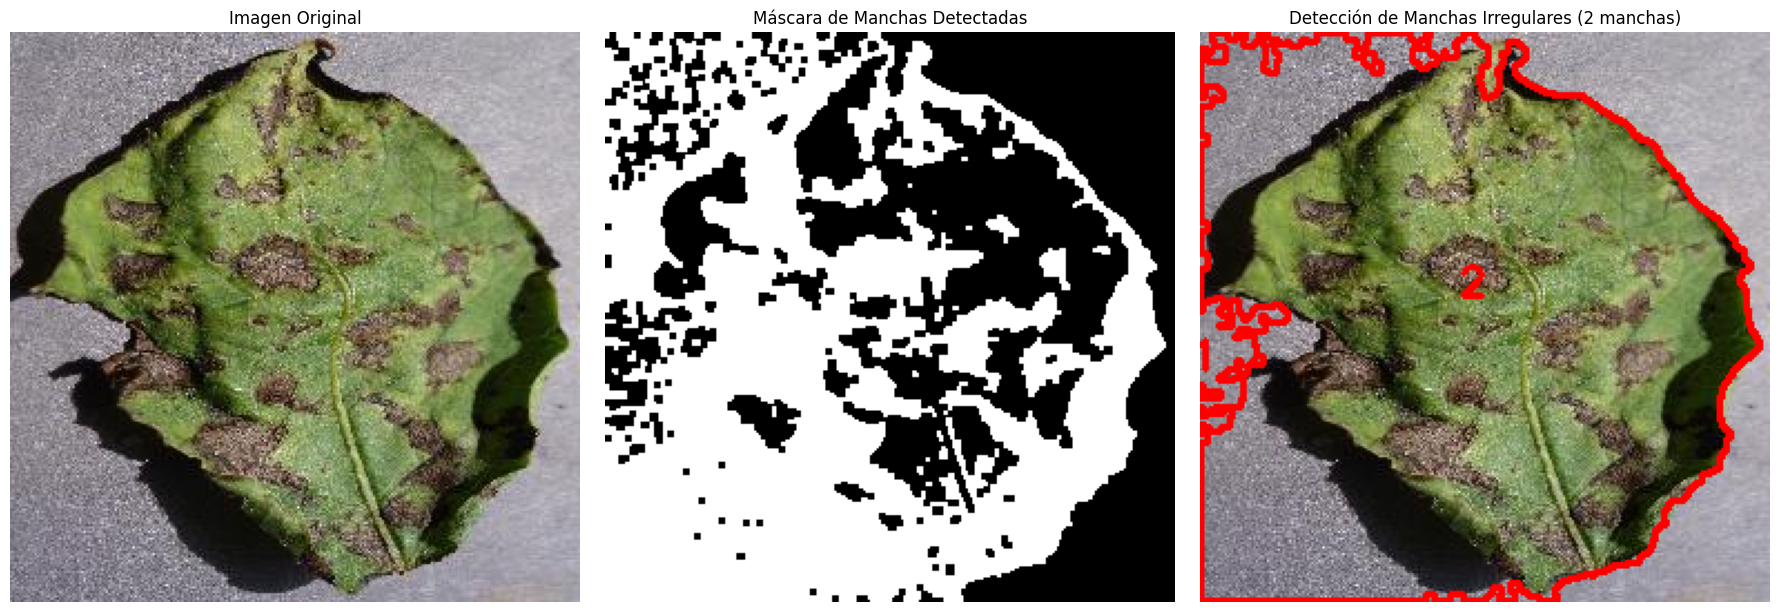

In [16]:
def dibujar_manchas_irregulares(imagen, resultado_deteccion, color_contorno=(255, 0, 0), grosor=2):
    """
    Dibuja contornos alrededor de las manchas irregulares detectadas.
    
    Args:
        imagen: Imagen original
        resultado_deteccion: Resultado de detectar_manchas_irregulares()
        color_contorno: Color del contorno (R, G, B)
        grosor: Grosor de la línea del contorno
    
    Returns:
        numpy array: Imagen con contornos dibujados
    """
    import cv2
    import numpy as np
    
    # Crear copia de la imagen para dibujar
    img_con_manchas = imagen.copy()
    
    # Dibujar contornos para cada mancha detectada
    for i, mancha in enumerate(resultado_deteccion['manchas']):
        contorno = mancha['contorno']
        centro = mancha['centro']
        
        # Dibujar contorno de la mancha
        cv2.drawContours(img_con_manchas, [contorno], -1, color_contorno, grosor)
        
        # Dibujar número de mancha
        cv2.putText(img_con_manchas, str(i+1), 
                   (centro[0]-10, centro[1]-10), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.6, color_contorno, 2)
    
    return img_con_manchas

# Probar la función mejorada con parámetros optimizados
resultado = detectar_manchas_irregulares(img_mpl, umbral_oscuro=120, area_minima=30, solidez_min=0.3)
print(f"Manchas detectadas: {resultado['total_manchas']}")

# Mostrar información de cada mancha
for i, mancha in enumerate(resultado['manchas']):
    print(f"Mancha {i+1}: Centro={mancha['centro']}, Área={mancha['area']:.1f}, Solidez={mancha['solidez']:.3f}")

# Aplicar detección y dibujar contornos
img_con_deteccion = dibujar_manchas_irregulares(resultado['imagen_original'], resultado)

# Mostrar resultados
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Imagen original
axes[0].imshow(resultado['imagen_original'])
axes[0].set_title('Imagen Original')
axes[0].axis('off')

# Máscara de manchas
axes[1].imshow(resultado['mascara'], cmap='gray')
axes[1].set_title('Máscara de Manchas Detectadas')
axes[1].axis('off')

# Imagen con contornos
axes[2].imshow(img_con_deteccion)
axes[2].set_title(f'Detección de Manchas Irregulares ({resultado["total_manchas"]} manchas)')
axes[2].axis('off')

plt.tight_layout()
plt.show()


Manchas detectadas (mejorado): 15
Mancha 1: Centro=(165, 244), Área=36.0, BBox=(157, 239, 16, 11)
Mancha 2: Centro=(157, 231), Área=22.5, BBox=(152, 225, 10, 12)
Mancha 3: Centro=(127, 207), Área=74.5, BBox=(118, 200, 19, 14)
Mancha 4: Centro=(120, 164), Área=87.0, BBox=(112, 158, 17, 12)
Mancha 5: Centro=(160, 139), Área=36.5, BBox=(156, 130, 8, 18)
Mancha 6: Centro=(198, 126), Área=30.0, BBox=(193, 121, 10, 11)
Mancha 7: Centro=(153, 102), Área=32.0, BBox=(149, 98, 8, 8)
Mancha 8: Centro=(106, 105), Área=77.5, BBox=(99, 96, 14, 19)
Mancha 9: Centro=(124, 100), Área=140.0, BBox=(113, 92, 23, 17)
Mancha 10: Centro=(206, 159), Área=3538.5, BBox=(161, 78, 90, 163)
Mancha 11: Centro=(217, 72), Área=30.5, BBox=(213, 67, 9, 11)
Mancha 12: Centro=(123, 68), Área=25.5, BBox=(120, 62, 6, 12)
Mancha 13: Centro=(200, 51), Área=23.0, BBox=(196, 48, 9, 6)
Mancha 14: Centro=(123, 29), Área=39.0, BBox=(120, 22, 6, 15)
Mancha 15: Centro=(152, 26), Área=400.5, BBox=(130, 4, 45, 44)


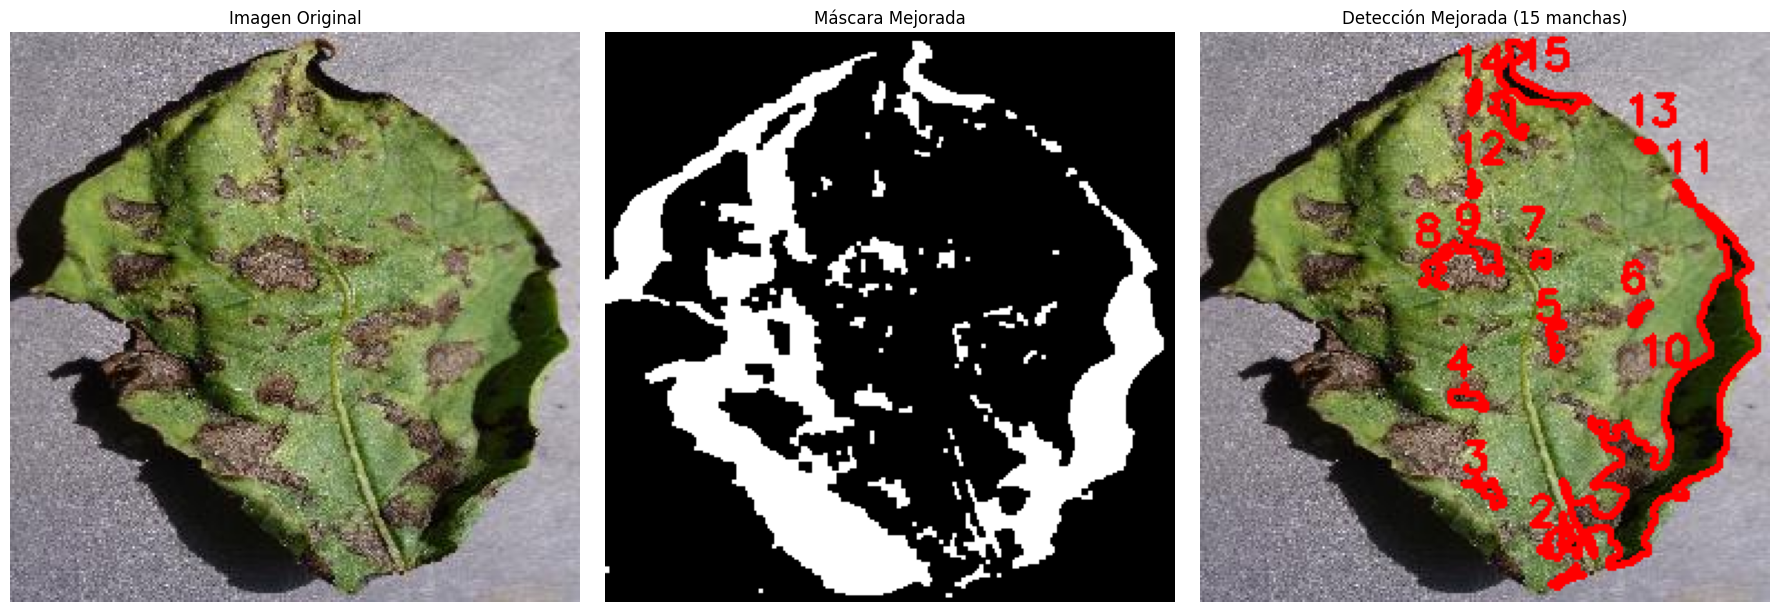

In [17]:
# Mejorar la detección con segmentación más precisa
def detectar_manchas_mejorado(imagen, umbral_oscuro=100, area_minima=20, solidez_min=0.2):
    """
    Versión mejorada que separa mejor las manchas individuales.
    """
    import cv2
    import numpy as np
    
    # Asegurar que la imagen sea un array numpy
    img_array = np.array(imagen, dtype=np.uint8)
    
    # Convertir RGB a espacio LAB
    img_lab = cv2.cvtColor(img_array, cv2.COLOR_RGB2LAB)
    L, A, B = cv2.split(img_lab)
    
    # Crear máscara más específica para manchas
    # 1. Píxeles con baja luminosidad (manchas oscuras)
    mascara_luminosidad = L < umbral_oscuro
    
    # 2. Píxeles con baja saturación (manchas grisáceas/marrones)
    img_hsv = cv2.cvtColor(img_array, cv2.COLOR_RGB2HSV)
    mascara_grises = (img_hsv[:,:,1] < 80) & (L < 120)
    
    # Combinar máscaras
    mascara_combinada = (mascara_luminosidad | mascara_grises).astype(np.uint8)
    
    # Aplicar filtros morfológicos más suaves
    kernel_small = np.ones((2,2), np.uint8)
    kernel_medium = np.ones((3,3), np.uint8)
    
    # Limpiar ruido pero preservar manchas pequeñas
    mascara_limpia = cv2.morphologyEx(mascara_combinada, cv2.MORPH_OPEN, kernel_small)
    mascara_limpia = cv2.morphologyEx(mascara_limpia, cv2.MORPH_CLOSE, kernel_medium)
    
    # Encontrar contornos
    contornos, _ = cv2.findContours(mascara_limpia, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Filtrar contornos más estrictamente
    manchas_detectadas = []
    for contorno in contornos:
        area = cv2.contourArea(contorno)
        if area >= area_minima:
            # Calcular solidez
            hull = cv2.convexHull(contorno)
            hull_area = cv2.contourArea(hull)
            if hull_area > 0:
                solidez = area / hull_area
                if solidez >= solidez_min:
                    # Obtener bounding box
                    x, y, w, h = cv2.boundingRect(contorno)
                    # Filtrar contornos muy grandes (probablemente la hoja completa)
                    if w < 200 and h < 200:  # Excluir contornos muy grandes
                        manchas_detectadas.append({
                            'centro': (int(x + w/2), int(y + h/2)),
                            'bbox': (x, y, w, h),
                            'area': area,
                            'solidez': solidez,
                            'contorno': contorno
                        })
    
    return {
        'manchas': manchas_detectadas,
        'total_manchas': len(manchas_detectadas),
        'mascara': mascara_limpia,
        'imagen_original': img_array
    }

# Probar la versión mejorada
resultado_mejorado = detectar_manchas_mejorado(img_mpl, umbral_oscuro=100, area_minima=20, solidez_min=0.2)
print(f"Manchas detectadas (mejorado): {resultado_mejorado['total_manchas']}")

# Mostrar información de cada mancha
for i, mancha in enumerate(resultado_mejorado['manchas']):
    print(f"Mancha {i+1}: Centro={mancha['centro']}, Área={mancha['area']:.1f}, BBox={mancha['bbox']}")

# Aplicar detección y dibujar contornos
img_con_deteccion = dibujar_manchas_irregulares(resultado_mejorado['imagen_original'], resultado_mejorado)

# Mostrar resultados
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Imagen original
axes[0].imshow(resultado_mejorado['imagen_original'])
axes[0].set_title('Imagen Original')
axes[0].axis('off')

# Máscara de manchas
axes[1].imshow(resultado_mejorado['mascara'], cmap='gray')
axes[1].set_title('Máscara Mejorada')
axes[1].axis('off')

# Imagen con contornos
axes[2].imshow(img_con_deteccion)
axes[2].set_title(f'Detección Mejorada ({resultado_mejorado["total_manchas"]} manchas)')
axes[2].axis('off')

plt.tight_layout()
plt.show()
